# Assignment 6 and 7 Analysis Script

Import libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import data from Kaggle.

In [3]:
data = pd.read_csv('Metro_Nashville_Police_Department_Incidents.csv')
data = data.dropna(subset=['Incident Reported']).reset_index(drop=True)
data.head()

,Primary Key,Incident Number,Report Type,Report Type Description,Incident Status Code,Incident Status Description,Investigation Status,Incident Occurred,Incident Reported,Incident Location,...,Weapon Description,Victim Number,Domestic Related,Victim Type,Victim Description,Victim Gender,Victim Race,Victim Ethnicity,Victim County Resident,Mapped Location
0,20210237359_11,20210237359,D,DISPATCHED,O,OPEN,Open,04/27/2021 08:00:00 AM,04/28/2021 02:08:00 PM,DIVISION ST,...,NONE,1,False,I,INDIVIDUAL (18 AND OVER),M,W,Hispanic,NON RESIDENT,POINT (-86.78 36.15)
1,20210248988_12,20210248988,D,DISPATCHED,O,OPEN,Open,05/04/2021 03:07:00 PM,05/04/2021 04:26:00 PM,SHELBY AVE,...,NONE,2,False,I,INDIVIDUAL (18 AND OVER),F,W,Non-Hispanic,RESIDENT,POINT (-86.75 36.17)
2,20150345704_11,20150345704,T,NaN,O,OPEN,Open,04/13/2015 03:00:00 PM,04/13/2015 05:12:00 PM,180 WALLACE RD,...,NONE,1,False,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,NaN
3,20210247765_11,20210247765,O,NaN,O,OPEN,Open,05/03/2021 11:00:00 PM,05/03/2021 11:49:00 PM,CLARKSVILLE PIKE,...,NONE,1,False,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,POINT (-86.9 36.32)
4,20210249540_11,20210249540,D,DISPATCHED,O,OPEN,Open,05/04/2021 11:45:00 PM,05/05/2021 12:45:00 AM,UNIVERSITY CT,...,PERSONAL (HANDS),1,False,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,POINT (-86.77 36.15)


In [188]:
data = data[(data['Incident Reported'].str.contains('2021')) | (data['Incident Reported'].str.contains('2020'))]
data.to_csv('data_reduced.csv')

Start building the dataset. 

1) Drop columns that will not be needed and reset the indices

2) The "count column" for davidson_data should include the cumulative counts at each day.

In [4]:
davidson_data = pd.read_csv('COVID.csv')
davidson_data = davidson_data.drop(columns=['NEVER','RARELY','SOMETIMES','FREQUENTLY','ALWAYS'])
davidson_data = davidson_data.T
davidson_data = davidson_data.rename(columns={'0':'count'})
davidson_data['date'] = davidson_data.index
davidson_data.reset_index(drop=False)
davidson_data = davidson_data.reset_index().drop(columns=['index'])
davidson_data = davidson_data.rename(columns={0:'count'})
davidson_data = davidson_data.iloc[12:].reset_index(drop=True)
davidson_data.head()

,count,date
0,0,1/22/20
1,0,1/23/20
2,0,1/24/20
3,0,1/25/20
4,0,1/26/20


Write a function to parse the dates and times of the incidents.

In [5]:
from datetime import datetime
def parse_date_time(date_time):
    return datetime.strptime(str(date_time),'%m/%d/%Y %I:%M:%S %p')

Loop through the "incident reported" column and pick out only the years we are researching (2020 and 2021)

In [6]:
indices = []
for i in range(0,len(data['Incident Reported'])):
    if str(parse_date_time(data['Incident Reported'][i]).year) == '2020':
        indices.append(i)
    elif str(parse_date_time(data['Incident Reported'][i]).year) == '2021':
        indices.append(i)

Reset the indices for the data frame.

In [7]:
covid_crime_data = data.iloc[indices]
covid_crime_data = covid_crime_data.reset_index(drop=True)

Parse the date-time value in the "Incident Reported" column to separate it into month, day, and year values.

In [8]:
 year = []
month = [] 
day = []
for i in range(0,len(covid_crime_data['Incident Reported'])):
    year.append(parse_date_time(covid_crime_data['Incident Reported'][i]).year)
    month.append(parse_date_time(covid_crime_data['Incident Reported'][i]).month)
    day.append(parse_date_time(covid_crime_data['Incident Reported'][i]).day)
covid_crime_data['year'] = year
covid_crime_data['month'] = month
covid_crime_data['day'] = day
covid_crime_data = covid_crime_data.sort_values(['year', 'month', 'day'], ascending=(True))

Reset the indices for the COVID cumulative cases data frame, rename the columns, and obtain only the dates of COVID cases that we need.

In [9]:
davidson_data.reset_index(drop=False)
davidson_data = davidson_data.reset_index().drop(columns=['index'])
davidson_data = davidson_data.rename(columns={0:'count'})
davidson_data = davidson_data.iloc[12:].reset_index(drop=True)
davidson_data

,count,date
0,0,2/3/20
1,0,2/4/20
2,0,2/5/20
3,0,2/6/20
4,0,2/7/20
...,...,...
633,121162,10/28/21
634,121275,10/29/21
635,121275,10/30/21
636,121275,10/31/21


Use the parse_date_time function above to parse through the police incident data.

In [10]:
year = []
month = []
day = []
for i in range(0,len(davidson_data['date'])):
    year.append(datetime.strptime(davidson_data['date'][i], '%m/%d/%y').year)
    month.append(datetime.strptime(davidson_data['date'][i], '%m/%d/%y').month)
    day.append(datetime.strptime(davidson_data['date'][i], '%m/%d/%y').day)
davidson_data['year'] = year
davidson_data['month'] = month
davidson_data['day'] = day

## Plots

Create a few elementary plots to understand the trends over time for both the COVID case counts and police incident counts.

1) Plot the number of police incidents by day in Davidson County, TN.

2) Plot the number of cumulative COVID cases over time in Davidson County, TN.

3) Plot the difference in COVID cases per day in Davidson County, TN.

4) Plot the difference in police incident cases per day in Davidson County, TN. 

Text(0, 0.5, 'Case count')

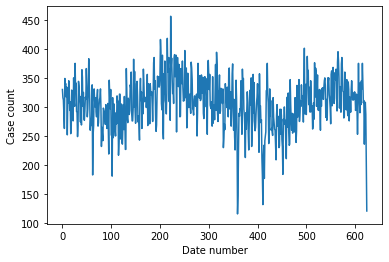

In [176]:
plt.plot(range(0,625),covid_crime_data.groupby(['year','month','day']).size().values)
plt.xlabel('Date number')
plt.ylabel('Case count')

Text(0, 0.5, 'Cumulative case count')

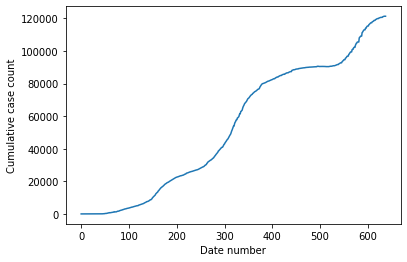

In [177]:
plt.plot(davidson_data.index,davidson_data['count'])
plt.xlabel('Date number')
plt.ylabel('Cumulative case count')

## Plot the first derivative 

In [13]:
covid_case_differences = [y-x for x, y in zip(davidson_data['count'][:-1], davidson_data['count'][1:])]
covid_case_differences

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 4,
 4,
 4,
 0,
 11,
 17,
 16,
 17,
 26,
 39,
 27,
 -3,
 89,
 4,
 36,
 19,
 64,
 18,
 49,
 98,
 132,
 112,
 -100,
 56,
 60,
 18,
 69,
 58,
 58,
 44,
 63,
 238,
 -142,
 30,
 0,
 46,
 24,
 158,
 173,
 37,
 44,
 0,
 215,
 77,
 125,
 100,
 102,
 45,
 71,
 158,
 40,
 121,
 131,
 95,
 34,
 95,
 29,
 143,
 58,
 43,
 64,
 115,
 43,
 122,
 50,
 77,
 21,
 173,
 108,
 0,
 118,
 104,
 69,
 53,
 114,
 84,
 110,
 68,
 74,
 72,
 0,
 0,
 283,
 106,
 87,
 122,
 104,
 59,
 146,
 178,
 65,
 100,
 89,
 56,
 247,
 136,
 198,
 66,
 171,
 249,
 69,
 97,
 48,
 151,
 195,
 196,
 289,
 128,
 0,
 341,
 221,
 532,
 356,
 325,
 276,
 363,
 116,
 394,
 635,
 315,
 386,
 227,
 147,
 667,
 229,
 345,
 432,
 360,
 369,
 333,
 179,
 322,
 150,
 261,
 224,
 313,
 343,
 300,
 241,
 168,
 131,
 302,
 198,
 144,
 80,
 163,
 249,
 189,
 184,
 198,
 237,
 102,
 143,
 179,
 236,
 

In [14]:
vals = covid_crime_data.groupby(['year','month','day']).size().values
covid_crime_differences = [y-x for x, y in zip(vals[:-1], vals[1:])]
covid_crime_differences

[-14,
 -4,
 -23,
 -26,
 86,
 -10,
 1,
 -23,
 17,
 -82,
 60,
 -5,
 38,
 -20,
 -31,
 15,
 -55,
 3,
 72,
 -11,
 3,
 -45,
 74,
 -39,
 -10,
 74,
 -48,
 14,
 -49,
 -1,
 -42,
 19,
 76,
 -8,
 -21,
 -10,
 -31,
 44,
 -49,
 95,
 -13,
 -50,
 24,
 -44,
 -4,
 16,
 24,
 -4,
 53,
 -30,
 -53,
 13,
 28,
 59,
 -46,
 -24,
 -53,
 17,
 -9,
 17,
 53,
 -155,
 70,
 15,
 63,
 -20,
 -11,
 16,
 -24,
 -9,
 35,
 12,
 -63,
 6,
 28,
 12,
 3,
 15,
 -33,
 -66,
 33,
 -13,
 -10,
 56,
 -4,
 -4,
 -9,
 -11,
 34,
 -7,
 -34,
 7,
 36,
 -38,
 -49,
 127,
 -29,
 -20,
 33,
 -78,
 -2,
 -69,
 135,
 -69,
 4,
 54,
 -32,
 -12,
 -11,
 40,
 -19,
 48,
 -12,
 3,
 -93,
 24,
 81,
 0,
 -77,
 56,
 4,
 -66,
 -3,
 32,
 36,
 -43,
 57,
 -39,
 -52,
 0,
 139,
 -37,
 -48,
 -8,
 42,
 -7,
 -21,
 7,
 44,
 -5,
 27,
 -71,
 -13,
 0,
 21,
 85,
 -82,
 61,
 -66,
 -23,
 15,
 53,
 4,
 -25,
 -45,
 11,
 -17,
 -25,
 83,
 23,
 -38,
 15,
 -63,
 51,
 -26,
 77,
 -24,
 -32,
 8,
 -5,
 -1,
 -12,
 9,
 48,
 -88,
 72,
 -17,
 6,
 -58,
 69,
 -14,
 -6,
 6,
 -21,
 -30,
 45,
 56

Text(0, 0.5, 'Case difference day by day')

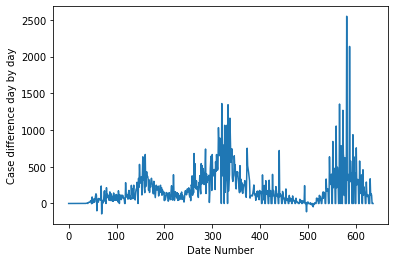

In [179]:
plt.plot(range(0,637),covid_case_differences)
plt.xlabel("Date Number")
plt.ylabel('Case difference day by day')

Text(0, 0.5, 'Difference in counts from previous day')

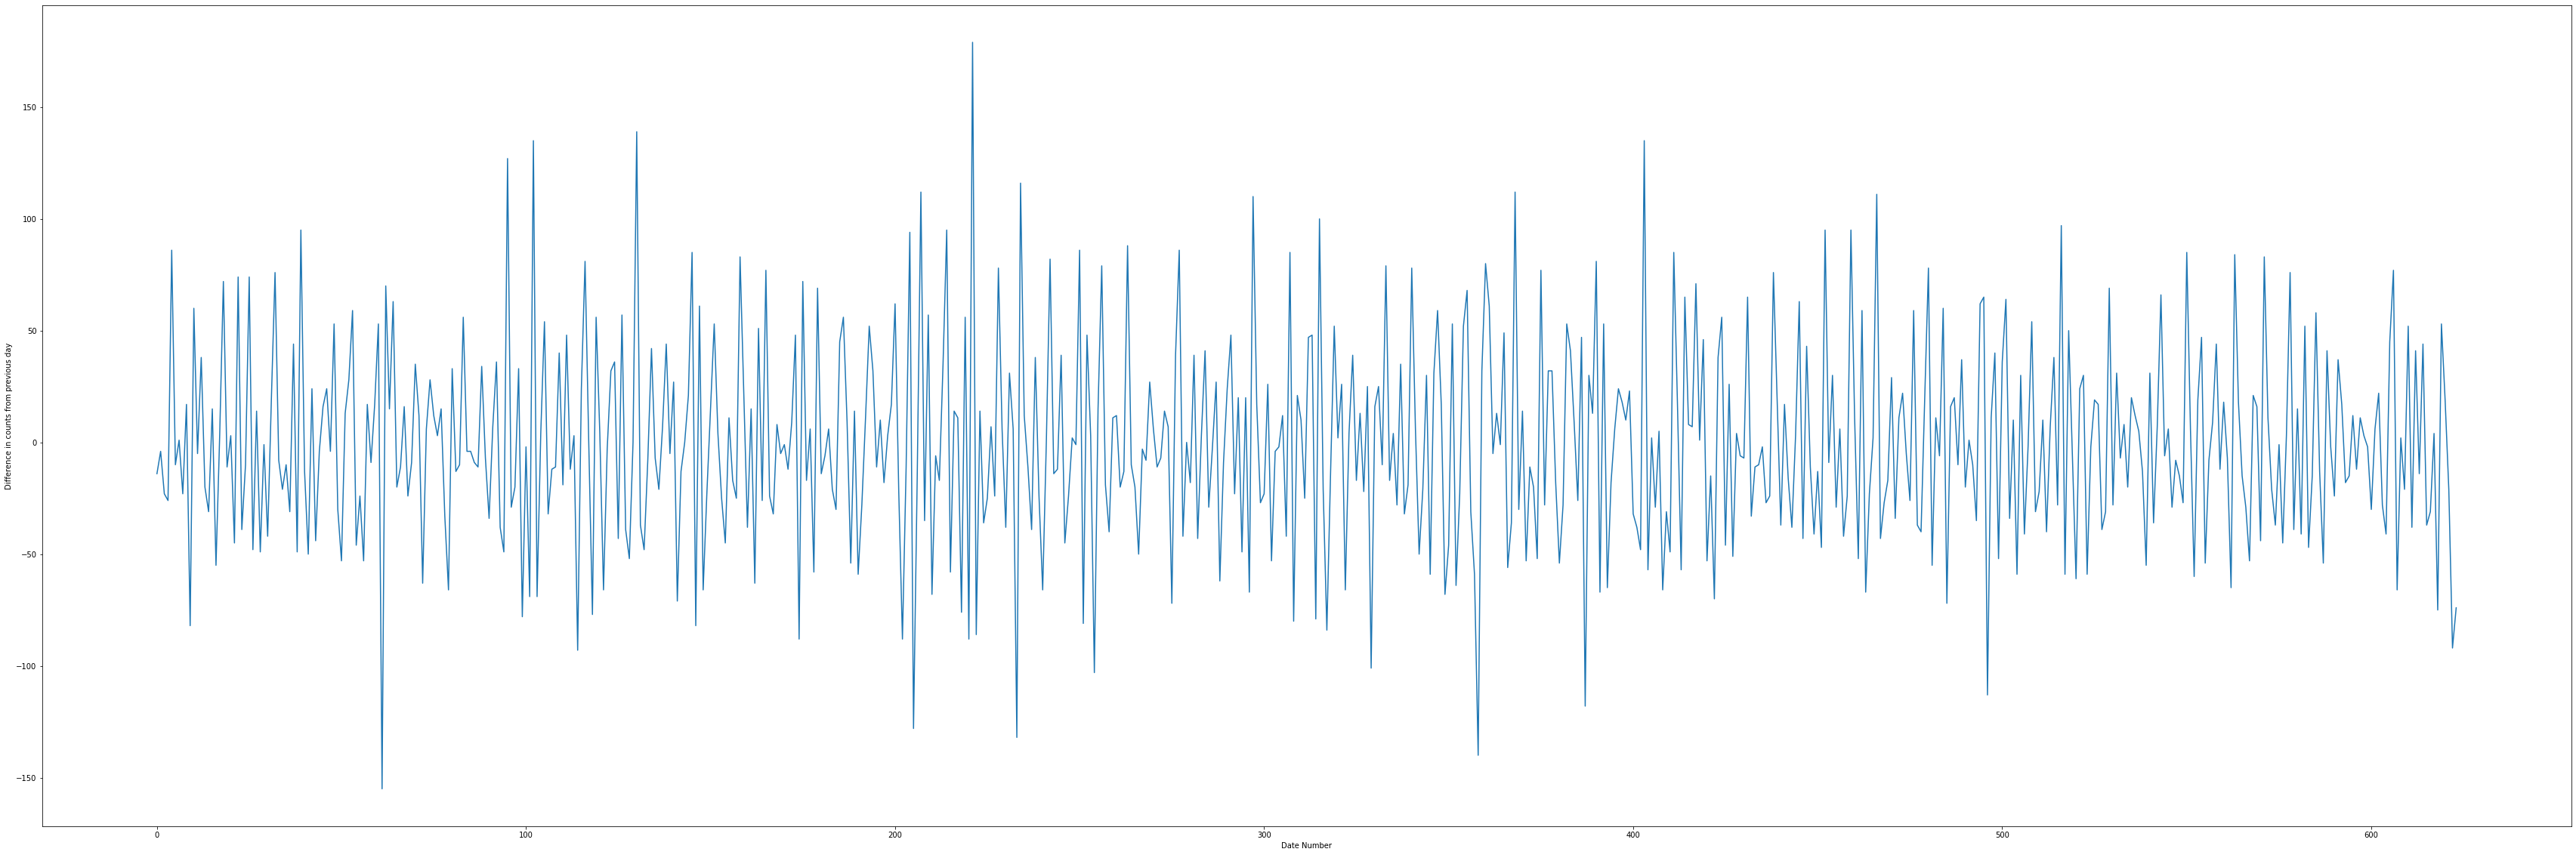

In [180]:
plt.figure(figsize=(60,20))
plt.plot(range(0,624),covid_crime_differences)
plt.xlabel("Date Number")
plt.ylabel("Difference in counts from previous day")

## Determine key time periods and run statistical tests

Create the data frame that will tell us the change in police incident counts per day.

In [18]:
df_covid_crime_diff = pd.DataFrame(covid_crime_data.groupby(['year','month','day']).size().index[1:],covid_crime_differences)
df_covid_crime_diff['difference'] = df_covid_crime_diff.index
df_covid_crime_diff = df_covid_crime_diff.reset_index(drop=True)
df_covid_crime_diff = df_covid_crime_diff.rename(columns={0:'date'})
df_covid_crime_diff.head()

,date,difference
0,"(2020, 1, 2)",-14
1,"(2020, 1, 3)",-4
2,"(2020, 1, 4)",-23
3,"(2020, 1, 5)",-26
4,"(2020, 1, 6)",86


Calculate the column that will tell us the differences between COVID-19 case counts per day.

In [19]:
df_covid_case_diff = pd.DataFrame(davidson_data.groupby(['year','month','day']).size().index[1:],covid_case_differences)
df_covid_case_diff['difference'] = df_covid_case_diff.index
df_covid_case_diff = df_covid_case_diff.reset_index(drop=True)
df_covid_case_diff = df_covid_case_diff.rename(columns={0:'date'})
df_covid_case_diff.head()

,date,difference
0,"(2020, 2, 4)",0
1,"(2020, 2, 5)",0
2,"(2020, 2, 6)",0
3,"(2020, 2, 7)",0
4,"(2020, 2, 8)",0


Add the columns in both data frames that represent the COVID-19 case counts and police incident counts per day.

In [20]:
df_covid_case_diff['case count'] = davidson_data['count'][1:].reset_index(drop=True)
df_covid_crime_diff['incident count'] = covid_crime_data.groupby(['year','month','day']).size().values[1:]

Set up the column in both data frames that will include the dates in M/DD/YYYY.

In [23]:
date_slash = []
for i in range(0,len(df_covid_case_diff)):
    var = df_covid_case_diff['date'][i]
    date_slash.append(str(var[0]) + '/' + str(var[1]) + '/' + str(var[2]))
df_covid_case_diff['date_slash'] = date_slash

date_slash = []
for i in range(0,len(df_covid_crime_diff)):
    var = df_covid_crime_diff['date'][i]
    date_slash.append(str(var[0]) + '/' + str(var[1]) + '/' + str(var[2]))
df_covid_crime_diff['date_slash'] = date_slash

Rename the columns accordingly.

In [24]:
df_covid_crime_diff = df_covid_crime_diff.rename(columns={'case difference':'incident difference'})
df_covid_case_diff = df_covid_case_diff.rename(columns={'incident difference':'case difference'})

Merge the two data frames so that we only have counts and differences for both COVID cases and police incidents for common days (February 2, 2020 to September 16, 2021).

In [26]:
combined = pd.merge(df_covid_crime_diff, df_covid_case_diff, on='date_slash',how='left').dropna().reset_index(drop=True).drop(columns=['date_y']).rename(columns={'date_x':'date'})

Rename the columns accordingly after the merge.

In [29]:
combined = combined.rename(columns={'difference_x': 'incident difference', 'difference_y': 'case difference'})

## Statistical Testing (two sample T test) 

Validate the assumptions that exist for two-sample t-testing:

1) The data points of the incident counts are continuous.

2) The data points of the incident counts follow a relatively normal distribution. 

Text(0, 0.5, 'Frequency')

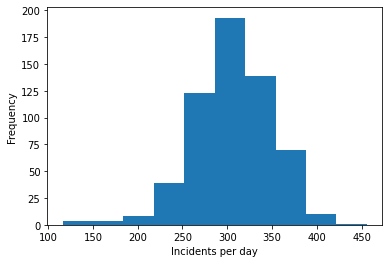

In [67]:
plt.hist(combined['incident count'])
plt.xlabel('Incidents per day')
plt.ylabel('Frequency')

Find the indices of the dates and time periods we will analyze.

In [30]:
idx_mask_mandate_start = combined[combined['date_slash']=='2020/7/3'].index.values[0]
idx_mask_mandate_end = combined[combined['date_slash']=='2021/5/14'].index.values[0]
idx_pres_election_start = combined[combined['date_slash']=='2020/11/7'].index.values[0]
idx_pres_election_end = combined[combined['date_slash']=='2021/1/20'].index.values[0]
idx_covid_vacc_start = combined[combined['date_slash']=='2021/3/8'].index.values[0]
idx_covid_vacc_end = combined[combined['date_slash']=='2021/9/16'].index.values[0]

Print the means of the case counts during the time period we are analyzing.

In [31]:
print(np.mean(combined['case difference'][idx_mask_mandate_start:idx_mask_mandate_end]))
print(np.mean(combined['case difference'][idx_pres_election_start:idx_pres_election_end]))
print(np.mean(combined['case difference'][idx_covid_vacc_start:idx_covid_vacc_end]))

252.33015873015873
497.5135135135135
155.51041666666666


Run the two-sample t-test for the police incident counts during the time periods we decided to analyze.

1) Test 1: Case counts from the start to the end of the COVID vaccine availability vs. all other days not in that category

2) Test 2: Case counts from the start to the end of the presidential election/lame-duck period vs. all other days not in that category

3) Test 3: Case counts from the start to the end of the county mask mandate vs. all other days not in that category

In [152]:
import scipy.stats
print(scipy.stats.ttest_ind(combined['case difference'][idx_covid_vacc_start:idx_covid_vacc_end],combined['case difference'].iloc[np.r_[0:idx_covid_vacc_start, idx_covid_vacc_end:590]]).pvalue)
print(scipy.stats.ttest_ind(combined['case difference'][idx_pres_election_start:idx_pres_election_end],combined['case difference'].iloc[np.r_[0:idx_pres_election_start, idx_pres_election_end:590]]).pvalue)
print(scipy.stats.ttest_ind(combined['case difference'][idx_mask_mandate_start:idx_mask_mandate_end],combined['case difference'].iloc[np.r_[0:idx_mask_mandate_start, idx_mask_mandate_end:590]]).pvalue)

0.023193922741119626
2.2866866156516793e-31
1.3978785941008516e-10


Run the two-sample t-test for the police incident counts during the time periods we decided to analyze.

1) Test 1: Incident counts from the start to the end of the COVID vaccine availability vs. all other days not in that category

2) Test 2: Incident counts from the start to the end of the presidential election/lame-duck period vs. all other days not in that category

3) Test 3: Incident counts from the start to the end of the county mask mandate vs. all other days not in that category

In [64]:
import scipy.stats
print(scipy.stats.ttest_ind(combined['incident count'][idx_covid_vacc_start:idx_covid_vacc_end],combined['incident count'].iloc[np.r_[0:idx_covid_vacc_start, idx_covid_vacc_end:590]]).pvalue)
print(scipy.stats.ttest_ind(combined['incident count'][idx_pres_election_start:idx_pres_election_end],combined['incident count'].iloc[np.r_[0:idx_pres_election_start, idx_pres_election_end:590]]).pvalue)
print(scipy.stats.ttest_ind(combined['incident count'][idx_mask_mandate_start:idx_mask_mandate_end],combined['incident count'].iloc[np.r_[0:idx_mask_mandate_start, idx_mask_mandate_end:590]]).pvalue)

0.8755846206269673
0.08846934504037794
0.41732050442038426


# Linear Regression Model Build

Build the linear regression model to see if we can predict the police incident counts based on the COVID-19 case counts in Davidson County, TN. 

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, y_train, X_test, y_test = train_test_split(combined['case difference'], combined['incident count'], test_size = 0.2, random_state=42)
model = LinearRegression()
model.fit([X_train],[y_train])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predict police incident counts based on the COVID-19 case counts and change the data shape into an one-dimensional array. 

In [89]:
predictions = model.predict([X_test])
preds = []
for i in range(0,len(predictions[0])):
    preds.append(predictions[0][i])

Plot the 119 predicted police incident counts (in blue) and the 119 actual test set police incident counts (in orange).

No handles with labels found to put in legend.


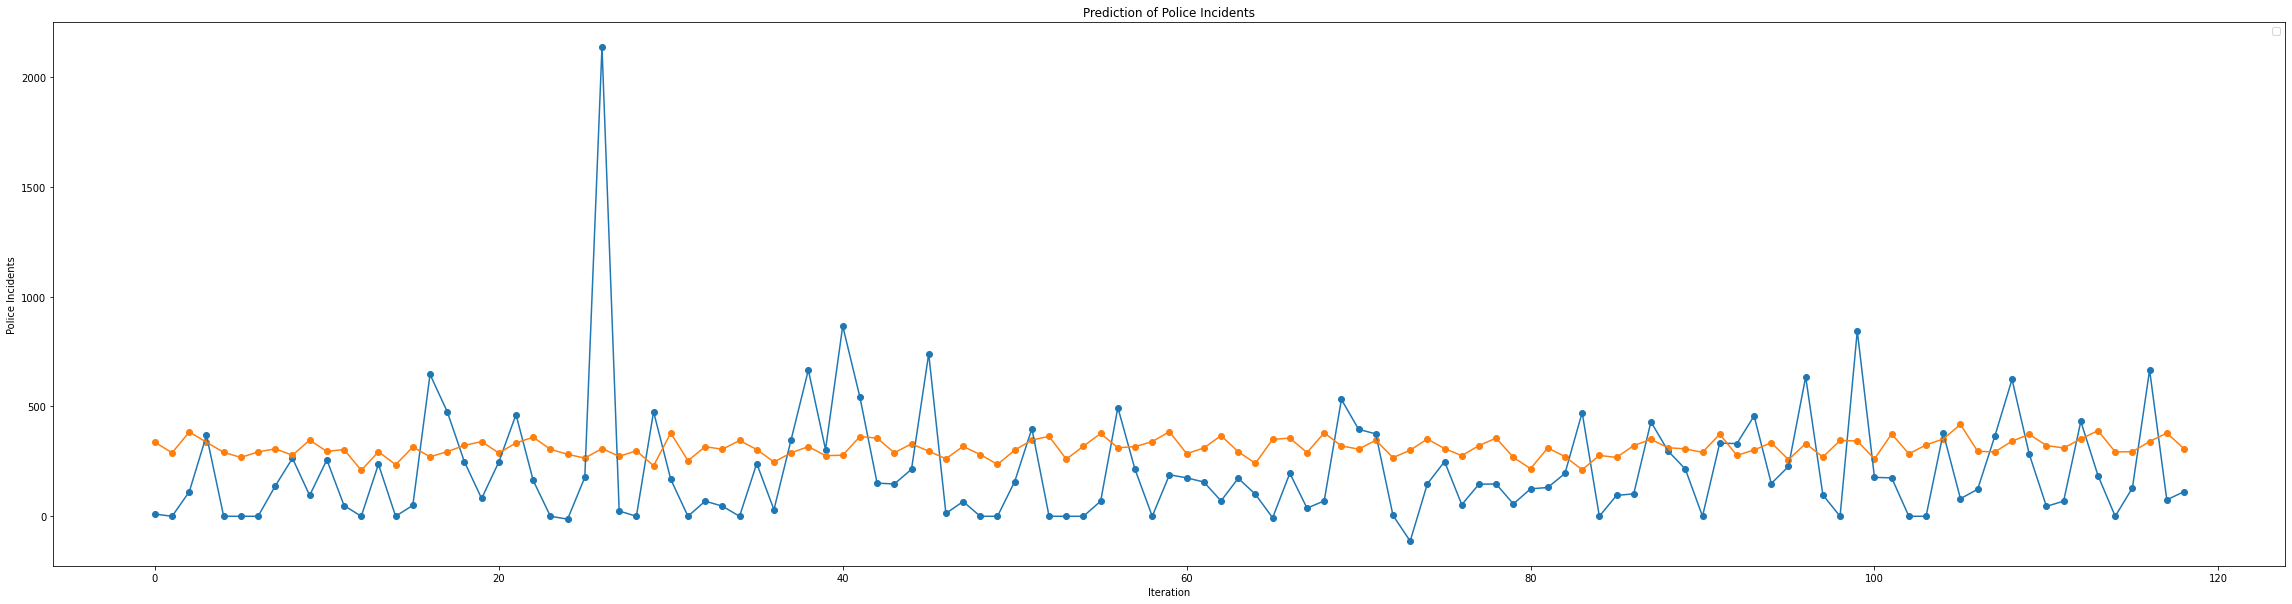

In [175]:
plt.figure(figsize=(40,10))
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Police Incidents')
plt.title('Prediction of Police Incidents')
plt.plot(np.arange(0,119),preds)
plt.plot(np.arange(0,119),y_test)
plt.scatter(np.arange(0,119),preds)
plt.scatter(np.arange(0,119),y_test)
plt.show()

Print the mean difference between the prediction set and the test set.

Calculate the number of predicted values whose difference between it and the true value were less than the mean difference.

In [189]:
mean_diff = np.mean(y_test - preds)
differences = np.array(preds-y_test)
print(mean_diff)
print(len(differences[np.where((np.absolute(differences) <= mean_diff))]))

101.15966386554622
27


Calculate the RMSE (root-mean-squared-error) for the predictions against the test set.

In [155]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(preds,y_test)))

287.8468313518975
